In [1]:
# https://github.com/dafiti/causalimpact

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

In [2]:
eurusd = pd.read_csv("eurusdlog.csv")

In [3]:
eurusd=np.array(eurusd)
eurusd

array([[0.04075799],
       [0.04650183],
       [0.05808021],
       [0.05448819],
       [0.05600219],
       [0.0556239 ],
       [0.0488854 ],
       [0.06447602],
       [0.06062462],
       [0.06719125],
       [0.06597499],
       [0.0610951 ],
       [0.07139   ],
       [0.07222763],
       [0.07166929],
       [0.06485097],
       [0.06672363],
       [0.06588137],
       [0.07640533],
       [0.07306457],
       [0.07714621],
       [0.07622003],
       [0.07055166],
       [0.06672363],
       [0.06840603],
       [0.06372569],
       [0.0629748 ],
       [0.05855189],
       [0.05609674],
       [0.05798585],
       [0.06391333],
       [0.05958879],
       [0.05363555],
       [0.05401459],
       [0.05694728],
       [0.05638033],
       [0.0605305 ],
       [0.05996558],
       [0.0548669 ],
       [0.05012261],
       [0.05373032],
       [0.05694728],
       [0.05656935],
       [0.05325637],
       [0.05694728],
       [0.06456977],
       [0.06485097],
       [0.062

In [4]:
gbpusd = pd.read_csv("gbpusdlog.csv")

In [5]:
gbpusd=np.array(gbpusd)
gbpusd

array([[0.20343052],
       [0.20693287],
       [0.21632033],
       [0.20815173],
       [0.19614228],
       [0.19597788],
       [0.19210686],
       [0.19975209],
       [0.19868691],
       [0.21414317],
       [0.20774561],
       [0.20855769],
       [0.22194283],
       [0.22562048],
       [0.23269776],
       [0.22944366],
       [0.22562048],
       [0.221382  ],
       [0.22992054],
       [0.23451861],
       [0.22641818],
       [0.2234635 ],
       [0.21913553],
       [0.22202292],
       [0.22657765],
       [0.22442273],
       [0.22330354],
       [0.22394323],
       [0.22033962],
       [0.22033962],
       [0.22130186],
       [0.2173669 ],
       [0.22033962],
       [0.21961734],
       [0.2269762 ],
       [0.22306355],
       [0.22098122],
       [0.21728643],
       [0.20847651],
       [0.20432764],
       [0.20285921],
       [0.20236925],
       [0.19958829],
       [0.19490867],
       [0.19606008],
       [0.1954023 ],
       [0.20163387],
       [0.196

In [6]:
# y is the time series, x is the covariate

X = eurusd
y = gbpusd

In [7]:
X=X.reshape(-1)
X

array([0.04075799, 0.04650183, 0.05808021, 0.05448819, 0.05600219,
       0.0556239 , 0.0488854 , 0.06447602, 0.06062462, 0.06719125,
       0.06597499, 0.0610951 , 0.07139   , 0.07222763, 0.07166929,
       0.06485097, 0.06672363, 0.06588137, 0.07640533, 0.07306457,
       0.07714621, 0.07622003, 0.07055166, 0.06672363, 0.06840603,
       0.06372569, 0.0629748 , 0.05855189, 0.05609674, 0.05798585,
       0.06391333, 0.05958879, 0.05363555, 0.05401459, 0.05694728,
       0.05638033, 0.0605305 , 0.05996558, 0.0548669 , 0.05012261,
       0.05373032, 0.05694728, 0.05656935, 0.05325637, 0.05694728,
       0.06456977, 0.06485097, 0.06250521, 0.0610951 , 0.07120376,
       0.0715762 , 0.07269269, 0.07788654, 0.07696104, 0.07575661,
       0.07751644, 0.08452496, 0.0817643 , 0.07287865, 0.07008561,
       0.06747172, 0.06344417, 0.06428849, 0.06400713, 0.06306869,
       0.0597772 , 0.05883479, 0.05958879, 0.05930611, 0.0610951 ,
       0.06062462, 0.06391333, 0.06821924, 0.06831264, 0.07306

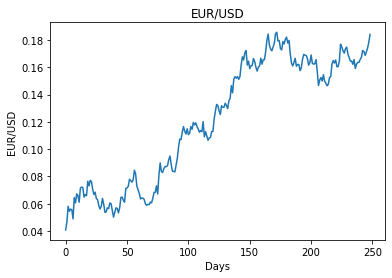

In [8]:
plt.plot(X)
plt.title("EUR/USD")
plt.xlabel("Days")
plt.ylabel("EUR/USD")
plt.show()

In [9]:
y=y.reshape(-1)
y

array([0.20343052, 0.20693287, 0.21632033, 0.20815173, 0.19614228,
       0.19597788, 0.19210686, 0.19975209, 0.19868691, 0.21414317,
       0.20774561, 0.20855769, 0.22194283, 0.22562048, 0.23269776,
       0.22944366, 0.22562048, 0.221382  , 0.22992054, 0.23451861,
       0.22641818, 0.2234635 , 0.21913553, 0.22202292, 0.22657765,
       0.22442273, 0.22330354, 0.22394323, 0.22033962, 0.22033962,
       0.22130186, 0.2173669 , 0.22033962, 0.21961734, 0.2269762 ,
       0.22306355, 0.22098122, 0.21728643, 0.20847651, 0.20432764,
       0.20285921, 0.20236925, 0.19958829, 0.19490867, 0.19606008,
       0.1954023 , 0.20163387, 0.19622446, 0.20065251, 0.21268909,
       0.21285076, 0.21228481, 0.22146214, 0.22122171, 0.22522139,
       0.22242329, 0.2297616 , 0.22338352, 0.21599808, 0.22226316,
       0.22609918, 0.22146214, 0.21809081, 0.22218309, 0.22202292,
       0.21495008, 0.21656194, 0.22186273, 0.22314355, 0.224902  ,
       0.22562048, 0.23007944, 0.24443527, 0.24600033, 0.24920

In [10]:
y

array([0.20343052, 0.20693287, 0.21632033, 0.20815173, 0.19614228,
       0.19597788, 0.19210686, 0.19975209, 0.19868691, 0.21414317,
       0.20774561, 0.20855769, 0.22194283, 0.22562048, 0.23269776,
       0.22944366, 0.22562048, 0.221382  , 0.22992054, 0.23451861,
       0.22641818, 0.2234635 , 0.21913553, 0.22202292, 0.22657765,
       0.22442273, 0.22330354, 0.22394323, 0.22033962, 0.22033962,
       0.22130186, 0.2173669 , 0.22033962, 0.21961734, 0.2269762 ,
       0.22306355, 0.22098122, 0.21728643, 0.20847651, 0.20432764,
       0.20285921, 0.20236925, 0.19958829, 0.19490867, 0.19606008,
       0.1954023 , 0.20163387, 0.19622446, 0.20065251, 0.21268909,
       0.21285076, 0.21228481, 0.22146214, 0.22122171, 0.22522139,
       0.22242329, 0.2297616 , 0.22338352, 0.21599808, 0.22226316,
       0.22609918, 0.22146214, 0.21809081, 0.22218309, 0.22202292,
       0.21495008, 0.21656194, 0.22186273, 0.22314355, 0.224902  ,
       0.22562048, 0.23007944, 0.24443527, 0.24600033, 0.24920

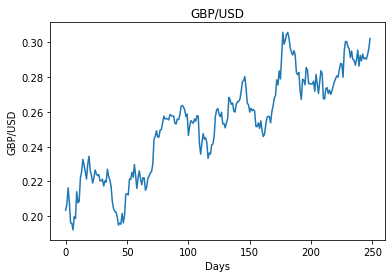

In [11]:
plt.plot(y)
plt.title("GBP/USD")
plt.xlabel("Days")
plt.ylabel("GBP/USD")
plt.show()

In [12]:
y.shape

(249,)

In [13]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 229]
post_period = [230, 248]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.29               5.56
Prediction (s.d.)         0.28 (0.0)         5.34 (0.06)
95% CI                    [0.27, 0.29]       [5.22, 5.47]

Absolute effect (s.d.)    0.01 (0.0)         0.22 (0.06)
95% CI                    [0.0, 0.02]        [0.09, 0.34]

Relative effect (s.d.)    4.1% (1.18%)       4.1% (1.18%)
95% CI                    [1.74%, 6.38%]     [1.74%, 6.38%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.29. By contrast, in the absence of an
intervention, we would have expected an average response of 0.28.
The 95% interval of this counterfactual prediction is [0.27, 0.29].
Subtracting this prediction from the observed response yield

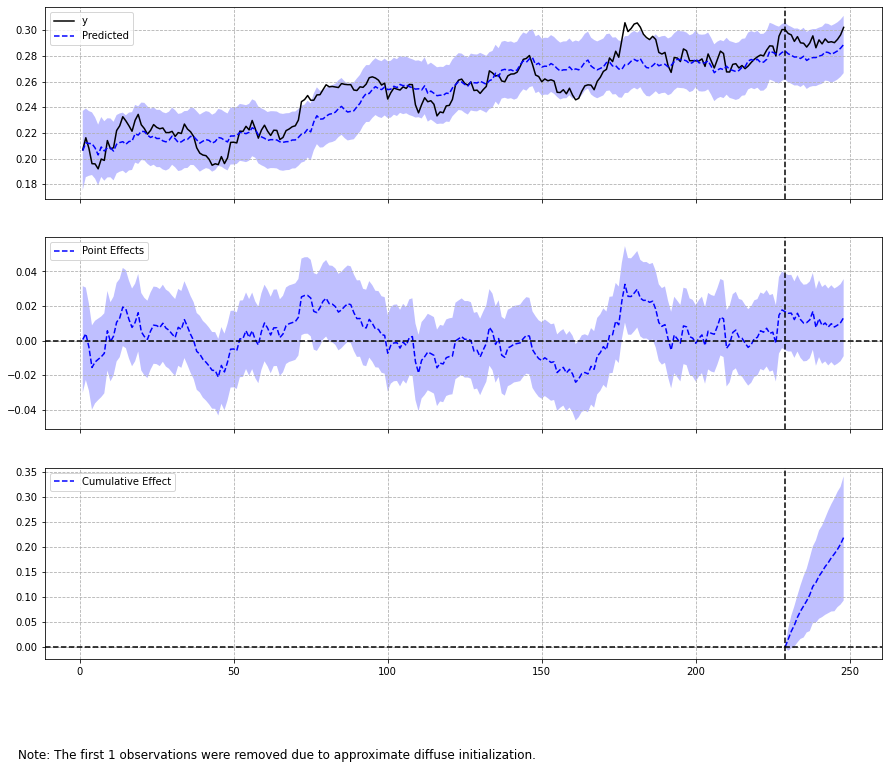

In [14]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()